# <a id='toc1_'></a>[Inaugural Project](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Inaugural Project](#toc1_)    
  - [Members](#toc1_1_)    
- [Imports and set magics:](#toc2_)    
- [Question 1](#toc3_)    
- [Question 2](#toc4_)    
- [Question 3](#toc5_)    
- [Question 4](#toc6_)    
- [Question 5](#toc7_)    


## <a id='toc1_1_'></a>[Members](#toc0_)
- [Johan Ølgaard](#toc2_)
- [Alon Clausen](#toc3_)
- [Valdemar Guldager](#toc4_)

-------------
# <a id='toc2_'></a>[Imports and set magics:](#toc0_)

In [1]:
#from types import SimpleNamespace
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import our own model
from HouseholdSpecializationModel import HouseholdSpecializationModelClass

# Create an instance of the model
model = HouseholdSpecializationModelClass()

**The model**
$$
\begin{align}
\max_{L_M,H_M,L_F,H_F} & \frac{Q^{1-\rho}}{1-\rho} - \nu \left(\frac{T_M^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}} + \frac{T_F^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}  \right), \ \rho > 1, \nu > 0, \epsilon > 0 \\
\text{s.t.}& \nonumber \\
C &= w_M L_M + w_F L_F \\
H &= \begin{cases}
\min\{H_M,H_F\} & \text{if } \sigma = 0 \\
H_M^{1-\alpha}H_F^\alpha & \text{if } \sigma = 1 \\
\left(\left(1-\alpha\right) H_M^{\frac{\sigma-1}{\sigma}} + \alpha H_F^{\frac{\sigma-1}{\sigma}}\right) & \text{else}
\end{cases}\\
Q &= C^\omega H^{1-\omega} \\
T_M &= L_M + H_M \\
T_F &= L_F + H_F \\
L_M,H_M,L_F,H_F &\geq 0 \\
T_M,T_F &\leq 24
\end{align}
$$

With baseline parameter values:
$$
\begin{align*}
\rho & = 2 \\
\nu &= 0.001 \\
\epsilon &= 1 \\
\omega &= 0.5 \\
\alpha &= 0.5 \\
\sigma &= 1 \\
w_F = w_M &= 1
\end{align*}

-------
# <a id='toc3_'></a>[Question 1](#toc0_)

We have solve the discrete model by looping over all different values for alpha and sigma in a for loop and stored the results in a matrix. 

From the matrix we then create a heatmap to visualize the results. 

We can then see how the ratio of $\frac{H_f}{H_M}$ changes with $\alpha$ and $\sigma$.

**Procdure** 

1. We start by defining the parameters of the model. 

3. We then define a function that takes the parameters as input and returns the ratio of $\frac{H_f}{H_M}$ by using a for loop to loop over all possible values of $\alpha$ and $\sigma$.

2. We then create a heatmap to visualize the results.



/Users/johan/Google Drive/04 Økonomi/06 Programming and Nummerical Analysis/02 Git/projects-2023-valros/inauguralproject/HouseholdSpecializationModel.py:68: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/johan/Google Drive/04 Økonomi/06 Programming and Nummerical Analysis/02 Git/projects-2023-valros/inauguralproject/HouseholdSpecializationModel.py:68: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/johan/Google Drive/04 Økonomi/06 Programming and Nummerical Analysis/02 Git/projects-2023-valros/inauguralproject/HouseholdSpecializationModel.py:72: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


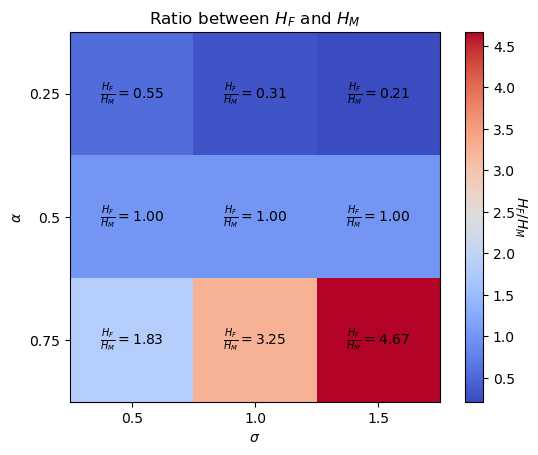

In [2]:
#Create empty array to store results
ratio_results = np.zeros((3,3))

#Create alpha and sigma values
alpha_range = [0.25,0.5,0.75]
sigma_range = [0.5,1.0,1.5]

#Loop over alpha and sigma
for i, a in enumerate(alpha_range):
    for j,s in enumerate(sigma_range):
        #Change alpha and sigma
        model.par.alpha = a
        model.par.sigma = s

        #Solve model
        model.solve_discrete()

        #Store results
        ratio_results[i, j] = model.opt.HF / model.opt.HM

#Plot results in heatmap
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
im = ax.imshow(ratio_results, cmap='coolwarm')

#Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel(r'$H_F/H_M$', rotation=270, labelpad=10)

#Set title
plt.title("Ratio between" + " " + r'$H_F$' + " " + "and" + " " r'$H_M$')


#Set labels
ax.set_xticks(np.arange(len(sigma_range)))
ax.set_yticks(np.arange(len(alpha_range)))
ax.set_xticklabels(sigma_range)
ax.set_yticklabels(alpha_range)
ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$\alpha$')

#Looping over data to create annotations
for i in range(len(alpha_range)):
    for j in range(len(sigma_range)):
        text = ax.text(j, i, r'$\frac{H_F}{H_M}=$'+f"{ratio_results[i, j]:.2f}",
                       ha="center", va="center", color="black")

#Show plot
plt.show()


-----
# <a id='toc4_'></a>[Question 2](#toc0_)

Explain your code and procedure

We discretely plot $\log \frac{H_F}{H_M}$ against $\log \frac{w_F}{w_M}$ for $w_F \in[0.8,0.9,1.0,1.1,1.2]$.

**Procedure**
1. We start by defining the parameters ($\alpha$ and $\sigma$) from the init method.

2. Hereafter we use the solve_wF_vec method to solve the model for the given parameters. (discrete = True)

3. Find the logHFM_ratio, which is derived from the the solve_wF_vec method (line 184 in HouseholdMOD.py). 

4. logFwM_ratio, is set equal to a numpy array for the natural logarithm. 

5. We then plot the results by using matplotlib.pyplot.

6. To create annotation we use a for loop for the range(5), as we have 5 datapoints. 

7. We then use the annotate method to annotate the datapoints.


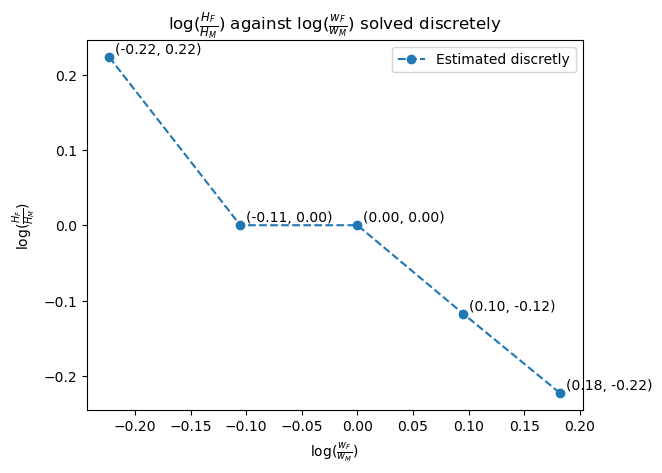

In [3]:
#Reset alpha and sigma to the baseline values
model.par.alpha = 0.5
model.par.sigma = 1.0


#Solving discretely for HF/HM ratio and creating log wF/wM ratio
model.solve_wF_vec(discrete=True)

logHFHM_ratio = model.opt.logHFHM
logwFwM_ratio = np.log([0.8, 0.9, 1.0, 1.1, 1.2])

#Plot results in a plot
plt.plot(logwFwM_ratio, logHFHM_ratio, 
         marker = 'o', 
         linestyle = '--', 
         label="Estimated discretly")

#Set title
plt.title(r'$\log(\frac{H_F}{H_M})$' + " against " r'$\log(\frac{w_F}{w_M})$' + " solved discretely")
plt.legend(loc='upper right')

#Set labels
plt.xlabel(r'$\log(\frac{w_F}{w_M})$')
plt.ylabel(r'$\log(\frac{H_F}{H_M})$')

#Looping over data to create annotations
for i in range(5):
    plt.annotate(f"({logwFwM_ratio[i]:.2f}, {logHFHM_ratio[i]:.2f})", (logwFwM_ratio[i]+0.005, logHFHM_ratio[i]+0.005))

#Show plot
plt.show()

------------
# <a id='toc5_'></a>[Question 3](#toc0_)

Explain your code and procedure

**Procedure**

1. We start by resettin alpha and sigma to the baseline value. 

2. Hereafter we use the solve_wF_vec method to solve the model for the given parameters.

3. Then we find the logHFHM_ratio_continuious, which is derived from the optimal model (model.opt.logHFHM)

4. The logFwM_ratio is then set equal to a log numpy array, for the values [0.8,0.9,1.0,1.1,1.2].

5. We can then plot the values with $\log\left(\frac{w_F}{w_M}\right)$ on the x-axis and $\log\left(\frac{H_F}{H_M}\right)$ on the y-axis.

6. We loop over the points to annotate them.


**Output**

The output received from the code is a plot of the $\log\left(\frac{H_F}{H_M}\right)$ ratio against the $\log\left(\frac{w_F}{w_M}\right)$ ratio. The plot is made by using the matplotlib.pyplot library. From the plot we can see that the $\log\left(\frac{H_F}{H_M}\right)$ ratio is increasing with the $\log\left(\frac{w_F}{w_M}\right)$ ration decreasing. This estimation is expected as the $\log\left(\frac{H_F}{H_M}\right)$ ratio is the ratio of the household's utility from consumption and leisure, and the logFwM ratio is the ratio of the household's wage and the market's wage.

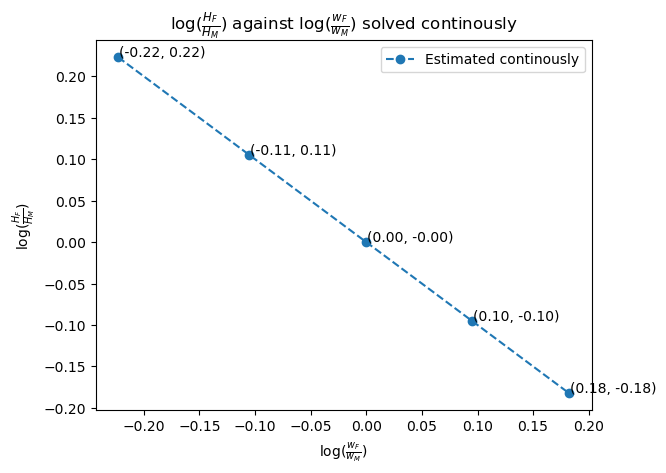

In [4]:
#Reset alpha and sigma to the baseline values
model.par.alpha = 0.5
model.par.sigma = 1.0

#Solving continously for HF/HM ratio and creating log of wFwM ratio
model.solve_wF_vec()

logHFHM_ratio_continous = model.opt.logHFHM
logwFwM_ratio = np.log([0.8, 0.9, 1.0, 1.1, 1.2])

#Plot results in a plot

plt.plot(logwFwM_ratio, logHFHM_ratio_continous, 
         marker = 'o', 
         linestyle = '--', 
         label="Estimated continously")

#Set title
plt.title(r'$\log(\frac{H_F}{H_M})$' + " against " r'$\log(\frac{w_F}{w_M})$' + " solved continously")
plt.legend(loc='upper right')

#Set labels
plt.xlabel(r'$\log(\frac{w_F}{w_M})$')
plt.ylabel(r'$\log(\frac{H_F}{H_M})$')

#Looping over data to create annotations
for i in range(5):
    plt.annotate(f"({logwFwM_ratio[i]:.2f}, {logHFHM_ratio_continous[i]:.2f})", (logwFwM_ratio[i]+0.001, logHFHM_ratio_continous[i]+0.0005))

#Show plot
plt.show()

---------
# <a id='toc6_'></a>[Question 4](#toc0_)

We start by estimating the model with the code in estimate model with scippy.optimize. Afterwards use the solution to continously solve for the optimum and then plot it against the estimated results from Siminski and Yetsenga (2022)


**Procedure**

1. We start by using the estimation method from the HouseholdMOD.py file.

2. We can then set sigma and alpha equal to the estimated values. 
    model.par.alpha = model.opt.alpha
    model.par.sigma = model.opt.sigma

3. We then use the solve_wF_vec method to solve the model for the given parameters.

4. We then generate the lines supplied from Siminski and Yetsenga (2022), by using the numpy.linspace method and the numpy.log method.

5. We then plot the results by using matplotlib.pyplot.

6. We loop over the points to annotate them.

**Output**

The output is a plot showing two graphs; Siminski and Yetsega and the estimated model. The estimated model is the blue line and the Siminski and Yetsega is the red line. The plot shows a deviation between the Siminski and Yetsega model and the estimated baseline model. We find the estimate

We find the values $\sigma$ and $\alpha$ to be a = 0.98 and 0.10 respectively, to minimize the function below: 
$$
\left(\beta_0-\hat{\beta}_0\right)^2+\left(\beta_1-\hat{\beta}_1\right)^2
$$

The estimated output is found to be a bit steeper, where as the Siminski Yetsega is flatter but with a higher intercept. A reason for this may be a different tolarance for risk. 





In [9]:
#Estimating alpha and sigma using the continously solved model
model.estimate()

#Settting alpha and sigma to the estimated values
model.par.alpha = model.opt.alpha
model.par.sigma = model.opt.sigma

/Users/johan/Google Drive/04 Økonomi/06 Programming and Nummerical Analysis/02 Git/projects-2023-valros/inauguralproject/HouseholdSpecializationModel.py:68: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/johan/Google Drive/04 Økonomi/06 Programming and Nummerical Analysis/02 Git/projects-2023-valros/inauguralproject/HouseholdSpecializationModel.py:68: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


/Users/johan/Google Drive/04 Økonomi/06 Programming and Nummerical Analysis/02 Git/projects-2023-valros/inauguralproject/HouseholdSpecializationModel.py:68: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


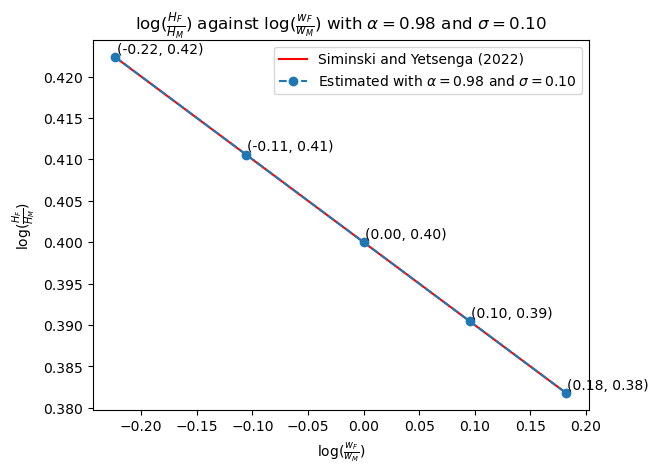

In [11]:
#Solving continously for HF/HM ratio and creating log of wFwM ratio
model.solve_wF_vec()

#Store results
logHFHM_ratio_continous = model.opt.logHFHM
logwFwM_ratio = np.log([0.8, 0.9, 1.0, 1.1, 1.2])

#Generating line by estimates from Siminski and Yetsenga (2022)
x = np.log(np.linspace(0.8, 1.2, 2))
y = model.par.beta0_target + model.par.beta1_target*x

#Plot results in a plot
plt.plot(x, y, color = 'red', linestyle = '-', label='Siminski and Yetsenga (2022)')
plt.plot(logwFwM_ratio, logHFHM_ratio_continous, 
         marker = 'o', 
         linestyle = '--', 
         label = 'Estimated with '+ r'$\alpha=$' f'{model.opt.alpha:.2f}'+ " and " + r'$\sigma=$' f'{model.opt.sigma:.2f}')

plt.legend(loc='upper right')

#Set title
plt.title(r'$\log(\frac{H_F}{H_M})$' + " against " r'$\log(\frac{w_F}{w_M})$' + " with " + r'$\alpha=$' f'{model.opt.alpha:.2f}'+ " and " + r'$\sigma=$' f'{model.opt.sigma:.2f}')

#Set labels
plt.xlabel(r'$\log(\frac{w_F}{w_M})$')
plt.ylabel(r'$\log(\frac{H_F}{H_M})$')

#Looping over data to create annotations
for i in range(5):
    plt.annotate(f"({logwFwM_ratio[i]:.2f}, {logHFHM_ratio_continous[i]:.2f})", (logwFwM_ratio[i]+0.001, logHFHM_ratio_continous[i]+0.0005))

#Show plot
plt.show()


---------------
# <a id='toc7_'></a>[Question 5](#toc0_)

The extension of the model we want to implement is...

**Procedure**

1. We have modified the household utilty functiion to include $\epsilon_M$ and $\epsilon_F$ as new parameters. This makes it possible to model to have different preferences for working
$$
\begin{align*}
\max_{L_M,H_M,L_F,H_F} & \frac{Q^{1-\rho}}{1-\rho} - \nu \left(\frac{T_M^{1+\frac{1}{\epsilon_M}}}{1+\frac{1}{\epsilon_M}} + \frac{T_F^{1+\frac{1}{\epsilon_F}}}{1+\frac{1}{\epsilon_F}}  \right)
\end{align*}
$$

2. We then assume $\alpha = 0.5$ as mentioned in the assignment i.e., men and women are equally productive in the household and normalize $\epsilon_M$ to 1. If $\epsilon_F > \epsilon_M = 1$ we have that women experience less of an increase in disutility from working more hours relative to men, and the oposite would be the case if $\epsilon_F < \epsilon_M = 1$

3. Both the baseline model and the extended model are then optimized to minimize the problem presented in 4. 

4. We then plot the results by using matplotlib.pyplot.


**Output**

We estimate the optimal extended model has at $\epsilon_F = 2.56$ with $\sigma = 1.00$ whereas, the optimal baseline model has $\sigma = 0.198$. The improvement in fit is substatial reducing the residual, $(\beta_0 - \hat{\beta}_0)^2 + (\beta_1 - \hat{\beta}_1)^2$, to $0.02$ with the baseline model having a residual of $0.170$. We therefore, conclude that the inclusion of gender differentiated $\epsilon$ does indeed improve our model.
The plot shows the baseline, the extended models, and Siminski and Yetsenga (2022), where we see our model is a substantial improvement.

In [32]:
# Create instances of the and extended models
extended_model = HouseholdSpecializationModelClass()

# Ensuring alpha is set to the baseline value in the model
model.par.alpha = 0.5
extended_model.par.alpha = 0.5

# Solve the models
extended_model.estimate(mode='extended')
model.estimate(mode='only_sigma')

# Set alpha and sigma to the estimated values
extended_model.par.epsilonF = extended_model.opt.epsilonF
extended_model.par.sigma = extended_model.opt.sigma
model.par.sigma = model.opt.sigma

#Printing the results
print(f"Estimated epsilonF in extend model:     {extended_model.opt.epsilonF:.3f} \n"
      f"Estimated sigma in extended model:      {extended_model.opt.sigma:.3f} \n"
      f"Estimated sigma baseline model:         {model.opt.sigma:.3f} \n"
      f"Residual in extended model:             {extended_model.opt.residual:.3f} \n"
      f"Residual in baseline model:             {model.opt.residual:.3f} \n"
      f"Improvement in extended model:          {extended_model.opt.residual - model.opt.residual:.3f}")


/Users/johan/Google Drive/04 Økonomi/06 Programming and Nummerical Analysis/02 Git/projects-2023-valros/inauguralproject/HouseholdSpecializationModel.py:68: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


Estimated epsilonF in extend model:     2.560 
Estimated sigma in extended model:      1.000 
Estimated sigma baseline model:         0.198 
Residual in extended model:             0.002 
Residual in baseline model:             0.170 
Improvement in extended model:          -0.168


/Users/johan/Google Drive/04 Økonomi/06 Programming and Nummerical Analysis/02 Git/projects-2023-valros/inauguralproject/HouseholdSpecializationModel.py:68: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/johan/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_optimize.py:790: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
/Users/johan/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_basinhopping.py:292: OptimizeWarning: Initial guess is not within the specified bounds
  return self.minimizer(self.func, x0, **self.kwargs)


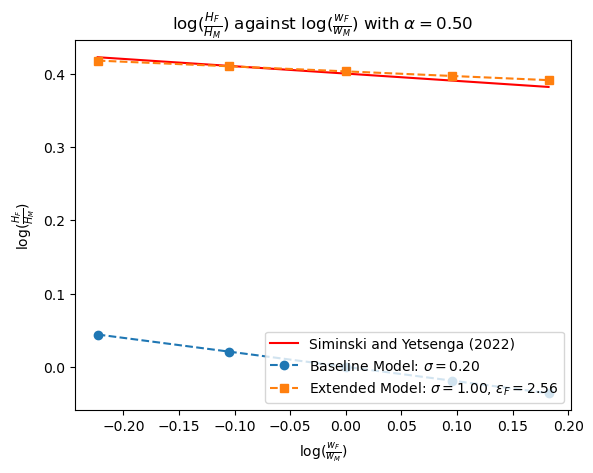

In [36]:
# Solve both models for different wFwM ratios
model.solve_wF_vec()
extended_model.solve_wF_vec(basin=True)

# Store results
logHFHM_ratio_baseline = model.opt.logHFHM
logHFHM_ratio_extended = extended_model.opt.logHFHM
logwFwM_ratio = np.log([0.8, 0.9, 1.0, 1.1, 1.2])

# Generate line by estimates from Siminski and Yetsenga (2022)
x = np.log(np.linspace(0.8, 1.2, 2))
y = model.par.beta0_target + model.par.beta1_target*x

# Plot results in a plot
plt.plot(x, y, color='red', linestyle='-', label='Siminski and Yetsenga (2022)')
plt.plot(logwFwM_ratio, logHFHM_ratio_baseline, 
         marker='o', 
         linestyle='--', 
         label="Baseline Model: " + r'$\sigma=$' f'{model.par.sigma:.2f}')
plt.plot(logwFwM_ratio, logHFHM_ratio_extended, 
         marker='s', 
         linestyle='--', 
         label="Extended Model: " + r'$\sigma=$' f'{extended_model.par.sigma:.2f}'+ ", "+ r'$\epsilon_F=$' f'{extended_model.par.epsilonF:.2f}')

plt.legend(loc='lower right')

# Set title
plt.title(r'$\log(\frac{H_F}{H_M})$' + " against " r'$\log(\frac{w_F}{w_M})$' + " with " + r'$\alpha=$' f'{model.par.alpha:.2f}')

# Set labels
plt.xlabel(r'$\log(\frac{w_F}{w_M})$')
plt.ylabel(r'$\log(\frac{H_F}{H_M})$')

# Show plot
plt.show()